In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from data_prep.prepare import PrepareData

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

path = r'C:\Users\jthan\OneDrive\Desktop\2023\PP\ElectionSL\data\final.csv'

df = pd.read_csv(path, index_col=0)
print(df.shape)

df_copy = df.copy()

(3113, 44)


In [2]:
df.head()

,FIPS,Code,Population,2020_winner,DEM_per,REP_per,OTH_per,2016_winner,fips_x,county,state_abbr,state,fips_y,per_hs,per_coll,per_grad,EST_RACE_T_POP_One_race_White,EST_RACE_T_POP_One_race_AA,EST_RACE_T_POP_One_race_AI,EST_RACE_T_POP_One_race_Asian,Percent_T_housing_units,"Percent_CITIZEN,_VOTE,_18_and_over_POP","Percent_CITIZEN,_VOTE,_18_and_over_POP_Male","Percent_CITIZEN,_VOTE,_18_and_over_POP_Female",EST_Percent_T_POP_AGE_20_to_24_years,EST_Percent_T_POP_AGE_25_to_29_years,EST_Percent_T_POP_AGE_35_to_39_years,EST_Percent_T_POP_AGE_40_to_44_years,EST_Percent_T_POP_AGE_45_to_49_years,EST_Percent_T_POP_AGE_50_to_54_years,EST_Percent_T_POP_AGE_55_to_59_years,EST_Percent_T_POP_AGE_60_to_64_years,EST_Percent_T_POP_AGE_65_to_69_years,EST_Percent_T_POP_AGE_70_to_74_years,EST_Percent_T_POP_AGE_75_to_79_years,EST_Percent_T_POP_AGE_80_to_84_years,EST_Percent_T_POP_AGE_85_YO,EST_Percent_Female_T_POP_SUM_Sex_ratio_(MP100F),EST_HH_Median_income_(dollars),MOE_HH_Median_income_(dollars),EST_HH_Mean_income_(dollars),MOE_HH_Mean_income_(dollars),EST_T_CE_POP_16_YO,EST_T_PERCENT_ALLOCATED_Occupation
0,1001,RTT,58805,Trump,27.0,71.4,1.5,REP,1001,Autauga County,AL,Alabama,1001,31.3788,45.7105,11.6244,42150,10866,155,649,NaN,41959,47.6,52.4,6.2,6.6,6.1,6.1,7.2,6.8,7.4,5.5,4.4,4.5,3.3,1.3,1.7,NaN,57982.0,4839.0,75614,5718,24580,10.8
1,1003,RTT,231767,Trump,22.4,76.2,1.4,REP,1003,Baldwin County,AL,Alabama,1003,27.1736,51.6035,11.6943,186504,19153,1514,2033,NaN,167986,47.8,52.2,5.1,5.6,5.5,5.8,6.5,6.6,7.0,7.4,6.4,6.0,4.1,2.2,1.9,NaN,61756.0,2268.0,83626,2634,98768,13.7
2,1005,OTT,25223,Trump,45.8,53.5,0.8,REP,1005,Barbour County,AL,Alabama,1005,35.7420,34.6575,4.3322,11587,11929,88,122,NaN,19468,53.2,46.8,6.1,7.4,7.2,5.7,6.1,6.4,6.4,6.4,5.7,5.8,3.6,2.1,1.9,NaN,34990.0,2909.0,51557,4229,8707,14.6
3,1007,RTT,22293,Trump,20.7,78.4,0.9,REP,1007,Bibb County,AL,Alabama,1007,45.0741,31.8634,3.9470,17138,5045,12,56,NaN,17583,53.6,46.4,5.8,7.9,6.6,6.8,7.2,6.8,6.7,6.0,5.4,4.3,3.6,1.7,1.5,NaN,51721.0,6237.0,61655,5787,8303,15.7
4,1009,RTT,59134,Trump,9.6,89.6,0.9,REP,1009,Blount County,AL,Alabama,1009,35.1007,43.3641,4.3603,54271,808,55,236,NaN,42978,48.9,51.1,5.5,6.2,5.7,6.8,6.8,6.4,6.8,6.8,5.7,4.7,2.6,2.8,2.2,NaN,48922.0,2269.0,66360,3864,22836,17.8


<Axes: >

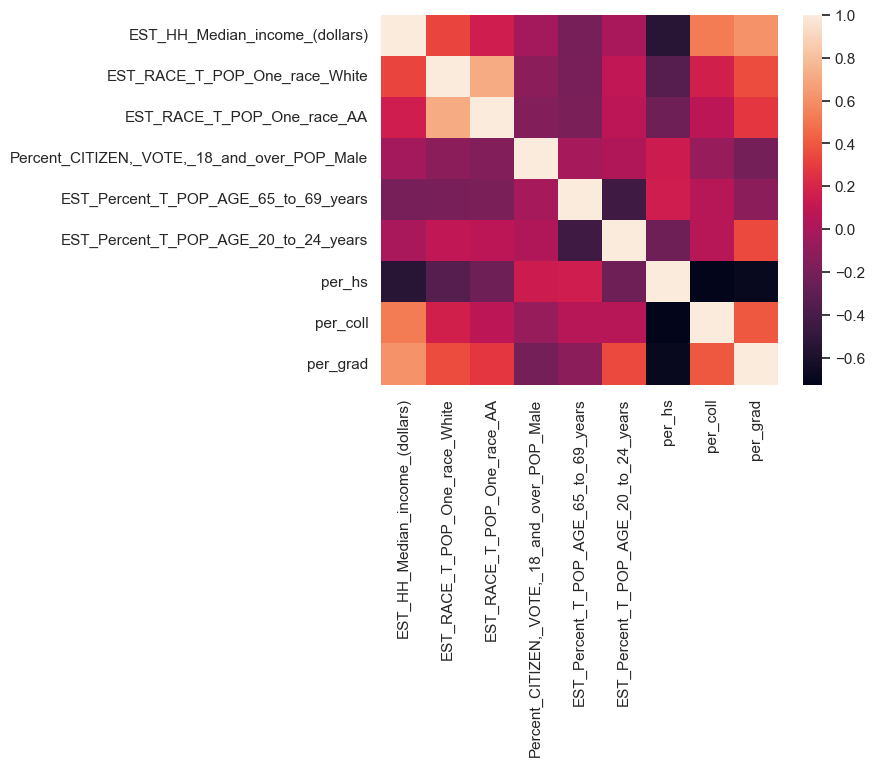

In [5]:
sns.heatmap(df[['EST_HH_Median_income_(dollars)', 'EST_RACE_T_POP_One_race_White', 'EST_RACE_T_POP_One_race_AA', 'Percent_CITIZEN,_VOTE,_18_and_over_POP_Male', 'EST_Percent_T_POP_AGE_65_to_69_years', 'EST_Percent_T_POP_AGE_20_to_24_years', 'per_hs', 'per_coll', 'per_grad']].corr(), annot=False)

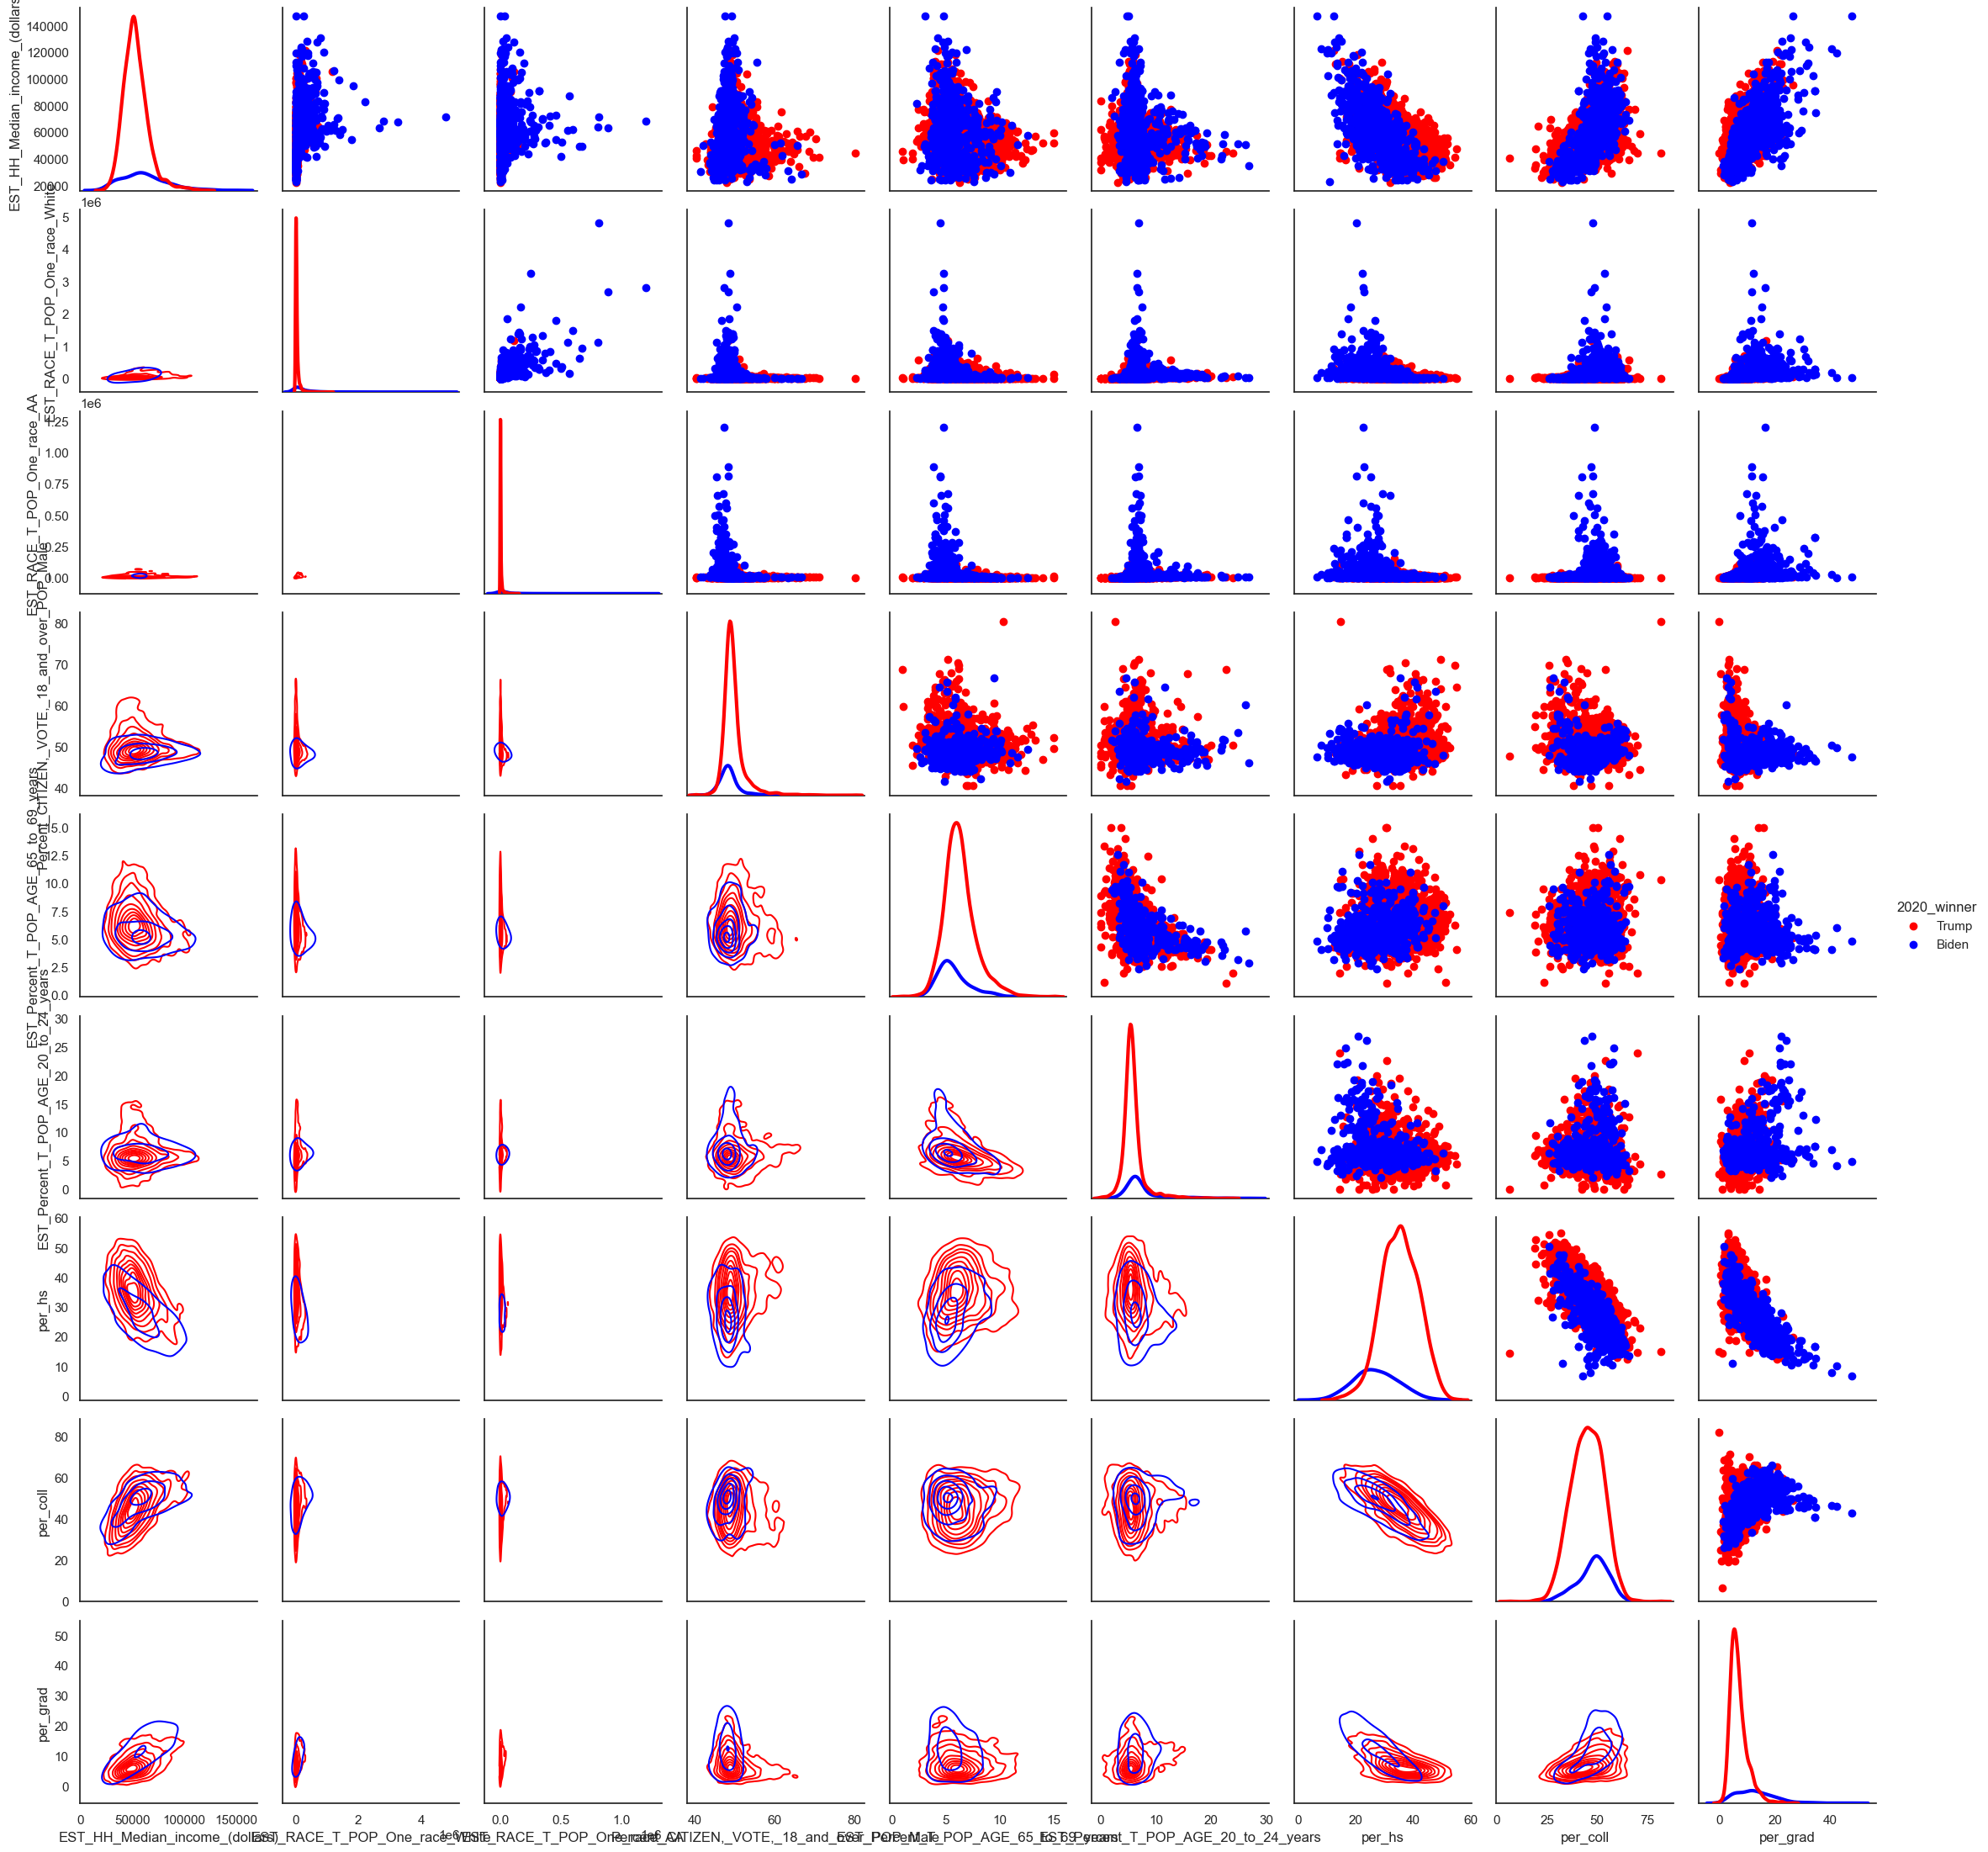

In [4]:
drop_columns = ['Code','DEM_per','REP_per','OTH_per','2016_winner','fips','county','state_abbr','state']
try:
    df_plot = df.drop(drop_columns, axis=1)
except :
    df_plot = df.copy()

palette = {"Trump": "red", "Biden": "blue"}

sns.set(style = "white")
g = sns.PairGrid(df_plot[['2020_winner', 'EST_HH_Median_income_(dollars)', 'EST_RACE_T_POP_One_race_White', 'EST_RACE_T_POP_One_race_AA', 'Percent_CITIZEN,_VOTE,_18_and_over_POP_Male', 'EST_Percent_T_POP_AGE_65_to_69_years', '2016_winner', 'EST_Percent_T_POP_AGE_20_to_24_years', 'per_hs', 'per_coll', 'per_grad']], diag_sharey = False, hue="2020_winner", palette=palette)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
g.add_legend()
plt.show()